<a href="https://colab.research.google.com/github/aadityaagrawal/Auto-Encoder/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import PIL
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

# Making Encoder and Decoder Model 

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()


train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.

train_X = np.reshape(train_X, (len(train_X), 28, 28, 1))  
test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))  

noise_factor = 0.5

train_X_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape)  
test_X_noisy = test_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_X.shape) 


train_X_noisy = np.clip(train_X_noisy, 0., 1.)   
test_X_noisy = np.clip(test_X_noisy, 0., 1.)

11501568/11490434 [==============================] - 0s 0us/step


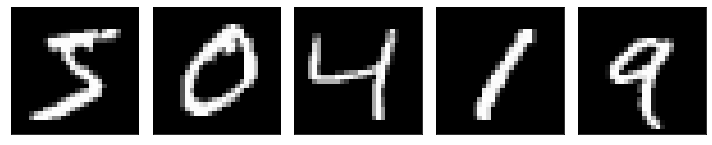

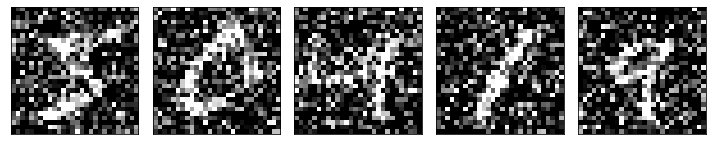

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_X[i].reshape(28, 28),  cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_X_noisy[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
Input_img = layers.Input(shape=(28, 28, 1))  


x1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(Input_img)
x1 = layers.MaxPool2D( (2, 2), padding='same')(x1)
x2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x2 = layers.MaxPool2D( (2, 2), padding='same')(x2)
x3 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
encoded    = layers.MaxPool2D( (2, 2), padding='same')(x3)


x3 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x3 = layers.UpSampling2D((2, 2))(x3)
x2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x2 = layers.UpSampling2D((2, 2))(x2)
x1 = layers.Conv2D(64, (3, 3), activation='relu')(x2)
x1 = layers.UpSampling2D((2, 2))(x1)
decoded   = layers.Conv2D(1, (3, 3), padding='same')(x1)


autoencoder = tf.keras.models.Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

a_e = autoencoder.fit(train_X_noisy, train_X,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(test_X_noisy, test_X),
                callbacks = [early_stopper]
                )

Epoch 1/100
469/469 [==============================] - 19s 12ms/step - loss: 0.2475 - val_loss: 0.2064
Epoch 2/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2112 - val_loss: 0.2460
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1991 - val_loss: 0.1981
Epoch 4/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2243 - val_loss: 0.2423
Epoch 5/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2196 - val_loss: 0.1985
Epoch 6/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1964 - val_loss: 0.1794
Epoch 7/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2098 - val_loss: 0.2129
Epoch 8/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1936 - val_loss: 0.1764
Epoch 9/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1798 - val_loss: 0.2395
Epoch 10/100
469/469 [==============================] - 5s 11ms/step - loss: 0.17

In [ ]:
pred = autoencoder.predict(test_X_noisy)

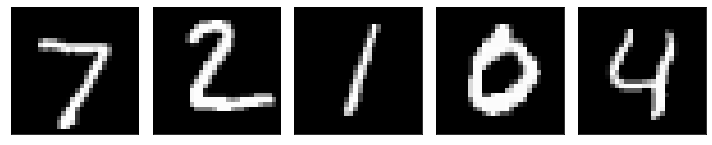

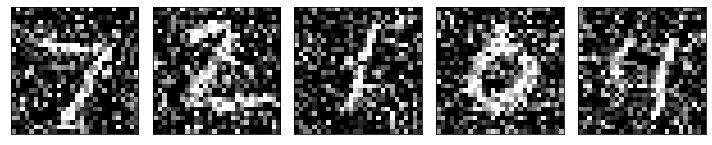

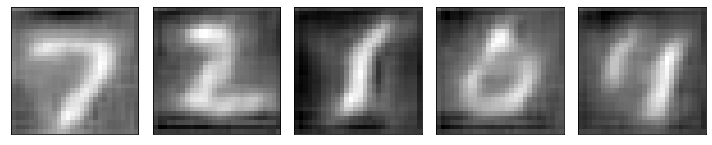

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(test_X[i].reshape(28, 28), cmap='gray') 
plt.tight_layout() 
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(test_X_noisy[i].reshape(28, 28), cmap='gray') 
plt.tight_layout() 
plt.show()


plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(pred[i].reshape(28, 28), cmap='gray') 
plt.tight_layout() 
plt.show()